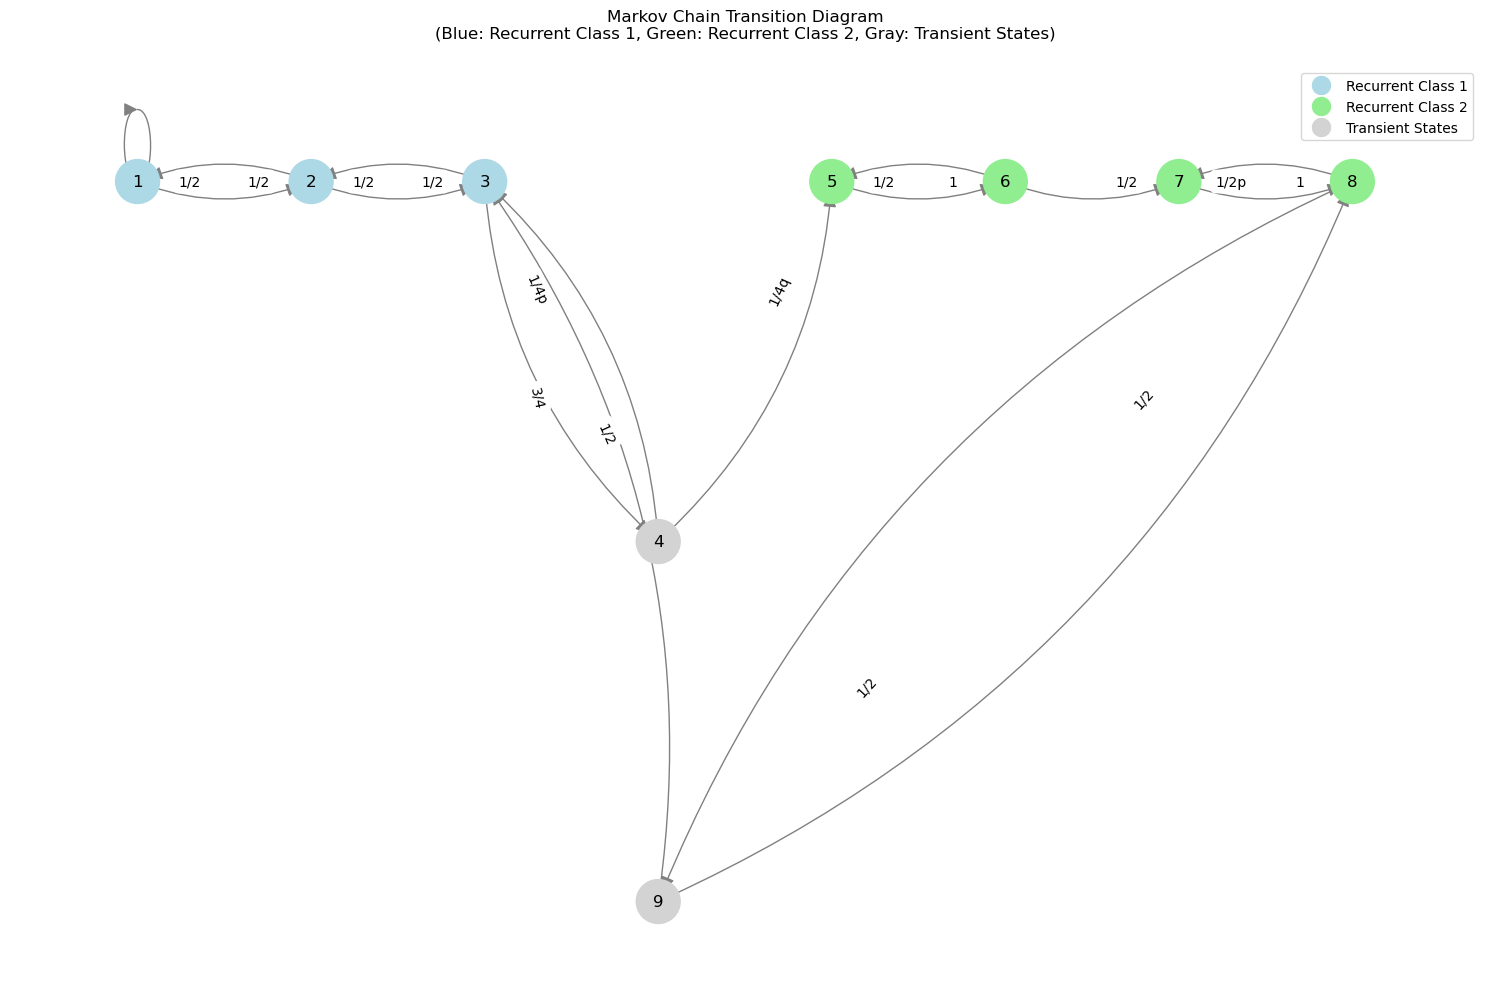

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_markov_chain_diagram(p=0.5):
    # Create directed graph
    G = nx.DiGraph()
    
    # Add nodes with positions in a circular layout but manually adjusted for clarity
    pos = {
        1: (0, 2),    # Recurrent class 1
        2: (1, 2),
        3: (2, 2),
        4: (3, 1),    # Transient state
        5: (4, 2),    # Recurrent class 2
        6: (5, 2),
        7: (6, 2),
        8: (7, 2),
        9: (3, 0)     # Transient state
    }
    
    # Add edges with weights
    edges = [
        (1, 1, '1/2'), (1, 2, '1/2'),
        (2, 1, '1/2'), (2, 3, '1/2'),
        (3, 2, '1/2'), (3, 4, '1/2'),
        (4, 3, f'1/4p'), (4, 5, f'1/4q'),
        (5, 6, '1'),
        (6, 5, '1/2'), (6, 7, '1/2'),
        (7, 8, '1'),
        (8, 7, f'1/2p'), (8, 9, '1/2'),
        (9, 8, '1/2'), (9, 3, '3/4')
    ]
    
    # Add nodes and edges to the graph
    G.add_nodes_from(range(1, 10))
    G.add_edges_from([(e[0], e[1]) for e in edges])
    
    # Create figure and axis
    plt.figure(figsize=(15, 10))
    
    # Draw the graph
    nx.draw_networkx_nodes(G, pos, 
                          node_color=['lightblue' if n in [1,2,3] else
                                    'lightgreen' if n in [5,6,7,8] else
                                    'lightgray' for n in G.nodes()],
                          node_size=1000)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', 
                          connectionstyle="arc3,rad=0.2",
                          arrows=True, arrowsize=20)
    
    # Add node labels
    nx.draw_networkx_labels(G, pos)
    
    # Add edge labels
    edge_labels = {(e[0], e[1]): e[2] for e in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, label_pos=0.3)
    
    # Add title and legend
    plt.title('Markov Chain Transition Diagram\n(Blue: Recurrent Class 1, Green: Recurrent Class 2, Gray: Transient States)',
             pad=20)
    
    # Remove axis
    plt.axis('off')
    
    # Add legend for node colors
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                 markerfacecolor=c, markersize=15, label=l)
                      for c, l in [('lightblue', 'Recurrent Class 1'),
                                 ('lightgreen', 'Recurrent Class 2'),
                                 ('lightgray', 'Transient States')]]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    return plt

# Create and display the diagram
plt.close('all')  # Close any existing plots
fig = create_markov_chain_diagram()
fig.savefig('markov', dpi=300, bbox_inches = 'tight')
plt.show()